In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, precision_score, recall_score, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

In [2]:
load_data= r"C:\Users\Dell\Downloads\ML\Dimensionality_reduction\breast_cancer.csv"
data= pd.read_csv(load_data)

In [3]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
data.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [5]:
train_features, test_features, train_labels, test_labels=train_test_split(
    data.drop(labels=['diagnosis'], axis=1),
    data['diagnosis'],
    test_size=0.2,
    random_state=41)

## Quasi-consant method

In [6]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(train_features)

len(train_features.columns[constant_filter.get_support()])

constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

train_features.drop(labels=constant_columns, axis=1, inplace=True)
test_features.drop(labels=constant_columns, axis=1, inplace=True)

In [7]:
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(train_features)
len(train_features.columns[qconstant_filter.get_support()])
qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

16


In [8]:
for column in qconstant_columns:
    print(column)

smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
smoothness_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [9]:
train_features = qconstant_filter.transform(train_features)
test_features = qconstant_filter.transform(test_features)

train_features.shape, test_features.shape

((455, 14), (114, 14))

In [10]:
X_train= train_features
y_train= train_labels
X_test= test_features
y_test= test_labels

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Model accuracy from cross validation score:  0.9383955185527804  
 


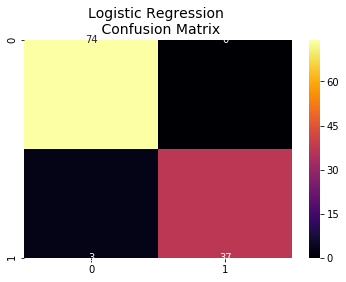

 

 Report : Logistics Regresion
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        74
           M       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [11]:
def class_log(X_train, y_train, X_test, y_test):
    #logistic regression
    logistic_Classifier= LogisticRegression(max_iter=100)
    logistic_Classifier.fit(X_train, y_train)

    # k cross validation
    accuracies = cross_val_score(estimator=logistic_Classifier, X=X_train, y=y_train, cv=10)
    model1_accuracy = accuracies.mean()
    model1_standard_deviation = accuracies.std()
    print("Model accuracy from cross validation score: ", model1_accuracy," \n ")

    #predicting y value
    diag_predlog=logistic_Classifier.predict(X_test)

    #confusion matrix
    logistic_confusion_matrix=confusion_matrix(y_test,diag_predlog)
    sns.heatmap(logistic_confusion_matrix,annot=True, cmap=plt.cm.inferno)
    plt.title('Logistic Regression \n Confusion Matrix', fontsize=14)
    plt.show()

    #generate report
    print(" \n\n Report : Logistics Regresion")
    print(classification_report(y_test, diag_predlog))

class_log(X_train, y_train, X_test, y_test)

## Anova 

In [12]:
train_features1, test_features1, train_labels1, test_labels1=train_test_split(
    data.drop(labels=['diagnosis'], axis=1),
    data['diagnosis'],
    test_size=0.2,
    random_state=41)

In [15]:
select_feature1 = SelectKBest(f_classif, k=14).fit_transform(train_features1, train_labels1)
select_test_feature1 = SelectKBest(f_classif, k=14).fit_transform(test_features1, test_labels1)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Model accuracy from cross validation score:  0.9385846438482887  
 


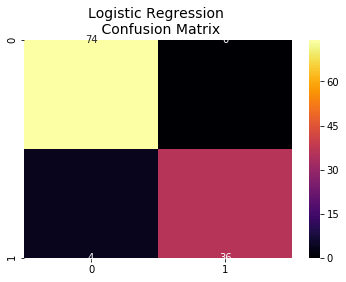

 

 Report : Logistics Regresion
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        74
           M       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [16]:
train_features01= select_feature1
test_features01= select_test_feature1
class_log(train_features01, train_labels1, test_features01, test_labels1)

## Mutual information

In [18]:
train_features2, test_features2, train_labels2, test_labels2=train_test_split(
    data.drop(labels=['diagnosis'], axis=1),
    data['diagnosis'],
    test_size=0.2,
    random_state=41)

In [19]:
select_feature2 = SelectKBest(mutual_info_classif, k=14).fit_transform(train_features2, train_labels2)
select_test_feature2 = SelectKBest(f_classif, k=14).fit_transform(test_features2, test_labels2)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Model accuracy from cross validation score:  0.943029088292733  
 


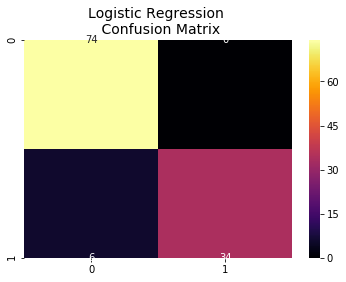

 

 Report : Logistics Regresion
              precision    recall  f1-score   support

           B       0.93      1.00      0.96        74
           M       1.00      0.85      0.92        40

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [20]:
train_features02= select_feature2
test_features02= select_test_feature2
class_log(train_features02, train_labels2, test_features02, test_labels2)

## Chi Squared Method

In [21]:
train_features3, test_features3, train_labels3, test_labels3=train_test_split(
    data.drop(labels=['diagnosis'], axis=1),
    data['diagnosis'],
    test_size=0.2,
    random_state=41)

In [22]:
select_feature3 = SelectKBest(chi2, k=14).fit_transform(train_features3, train_labels3)
select_test_feature3 = SelectKBest(f_classif, k=14).fit_transform(test_features3, test_labels3)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Model accuracy from cross validation score:  0.9406177407750025  
 


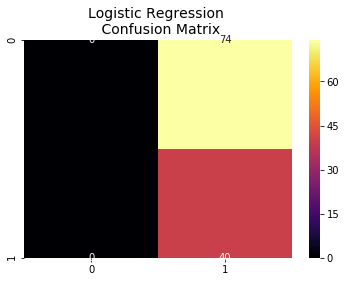

 

 Report : Logistics Regresion
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        74
           M       0.35      1.00      0.52        40

    accuracy                           0.35       114
   macro avg       0.18      0.50      0.26       114
weighted avg       0.12      0.35      0.18       114



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
train_features03= select_feature3
test_features03= select_test_feature3
class_log(train_features03, train_labels3, test_features03, test_labels3)

### thank You !!!